In [146]:
from typing import List, Optional, Callable, Iterable
from itertools import islice

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from gluonts.dataset.repository import get_dataset
from gluonts.dataset.pandas import PandasDataset


In [172]:
dataset = get_dataset("electricity")  #va contenir un .train, un .test directement.


In [148]:
for item in dataset.train: #feat_static_cat, feat_static_real, feat_dynamic_cat ? 
    print(item)

{'target': array([14., 18., 21., ...,  6.,  9.,  7.], dtype=float32), 'start': Period('2012-01-01 00:00', 'H'), 'feat_static_cat': array([0], dtype=int32), 'item_id': 0}
{'target': array([ 69.,  92.,  96., ..., 110., 115., 119.], dtype=float32), 'start': Period('2012-01-01 00:00', 'H'), 'feat_static_cat': array([1], dtype=int32), 'item_id': 1}
{'target': array([234., 312., 312., ...,   8.,  10.,   8.], dtype=float32), 'start': Period('2012-01-01 00:00', 'H'), 'feat_static_cat': array([2], dtype=int32), 'item_id': 2}
{'target': array([415., 556., 560., ..., 386., 440., 584.], dtype=float32), 'start': Period('2012-01-01 00:00', 'H'), 'feat_static_cat': array([3], dtype=int32), 'item_id': 3}
{'target': array([215., 292., 272., ..., 188., 194., 208.], dtype=float32), 'start': Period('2012-01-01 00:00', 'H'), 'feat_static_cat': array([4], dtype=int32), 'item_id': 4}
{'target': array([1056., 1363., 1240., ...,  566.,  659.,  818.], dtype=float32), 'start': Period('2012-01-01 00:00', 'H'), 'f

In [211]:
import pandas as pd

url = (
    "https://gist.githubusercontent.com/rsnirwan/a8b424085c9f44ef2598da74ce43e7a3"
    "/raw/b6fdef21fe1f654787fa0493846c546b7f9c4df2/ts_long.csv"
)
df = pd.read_csv(url, index_col=0, parse_dates=True)
df["dynamic_item1"] = np.random.normal(0,1,len(df))
df["dynamic_item2"] = np.random.normal(0,1,len(df))
df["dynamic_item3"] = np.random.normal(0,1,len(df))
df.head()

,target,item_id,dynamic_item1,dynamic_item2,dynamic_item3
2021-01-01 00:00:00,-1.3378,A,1.735452,0.610813,-0.164598
2021-01-01 01:00:00,-1.6111,A,-0.627873,-0.245539,-2.176785
2021-01-01 02:00:00,-1.9259,A,-0.438270,1.456752,-1.122784
2021-01-01 03:00:00,-1.9184,A,1.015295,3.061564,1.692756
2021-01-01 04:00:00,-1.9168,A,0.097171,-0.700198,-0.512162


In [150]:
df["item_id"].unique() #certain nb de lettres identiques 

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [129]:
#plt.figure()
#df[df["item_id"]=="A"].plot(label="A")
#df[df["item_id"]=="A"].plot(label="B")
#plt.legend()

In [223]:
import sys
print(sys.executable)


/Users/adriencortes/Documents/13- Articles/7- TimeGrad/pytorch-ts-master/pytorchts/bin/python


In [221]:
dataset = PandasDataset.from_long_dataframe(df,item_id="item_id",target="target",feat_dynamic_real=["dynamic_item1","dynamic_item2","dynamic_item3"]) #ne poss

In [222]:
for item in dataset:
    print(item)
    break


{'start': Period('2021-01-01 00:00', 'H'), 'target': array([-1.3378e+00, -1.6111e+00, -1.9259e+00, -1.9184e+00, -1.9168e+00,
       -1.9681e+00, -1.7846e+00, -1.5927e+00, -1.2477e+00, -9.5600e-01,
       -5.3710e-01, -6.3500e-02,  2.4840e-01,  6.2010e-01,  5.0230e-01,
        1.0044e+00,  8.5350e-01,  8.1800e-01,  8.1540e-01,  7.0800e-01,
        6.3530e-01,  2.3250e-01, -4.4800e-02, -2.5390e-01, -5.3010e-01,
       -5.6040e-01, -8.3440e-01, -5.7200e-01, -5.6040e-01, -4.8820e-01,
       -2.4090e-01,  5.6700e-02,  3.9530e-01,  7.2090e-01,  9.3600e-01,
        1.1985e+00,  1.4179e+00,  1.6294e+00,  1.6792e+00,  1.5665e+00,
        1.4542e+00,  1.3784e+00,  1.0784e+00,  7.0940e-01,  3.7570e-01,
        1.0000e-01, -3.8050e-01, -9.3510e-01, -1.2102e+00, -1.5725e+00,
       -1.6813e+00, -1.8947e+00, -2.0547e+00, -1.7722e+00, -1.7434e+00,
       -1.5327e+00, -1.2614e+00, -8.9450e-01, -3.9980e-01, -9.3100e-02,
        1.5230e-01,  6.5690e-01,  7.8350e-01,  1.0239e+00,  9.2650e-01,
        8.5

In [153]:
from deepar import DeepAREstimator

deepAREstimator = DeepAREstimator(
    num_layers= 4,
    hidden_size=46,
    prediction_length=10,
    context_length=100,
    freq="H",
    trainer_kwargs={
        "enable_progress_bar": False,
        "enable_model_summary": False,
        "max_epochs": 30,
    },
)


In [154]:
predictorDeepAR = deepAREstimator.train(dataset, cache_data=True)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/Users/adriencortes/Documents/13- Articles/7- TimeGrad/pytorch-ts-master/pytorchts/lib/python3.9/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: Epoch 0, global step 50: 'train_loss' reached 0.89528 (best 0.89528), saving model to '/Users/adriencortes/Documents/20-TimeSeriesFeatRehm/gluonTSDemo/gluonTS/gluonTS/lightning_logs/version_20/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 0.89528 (best 0.89528), saving model to '/Users/adr

In [134]:
from gluonts.evaluation import make_evaluation_predictions
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset,
    predictor=predictorDeepAR,
)

In [135]:
if not hasattr(np, 'bool'):
    np.bool = bool
forecasts = list(forecast_it)
tss = list(ts_it)

In [136]:
len(forecasts)

10

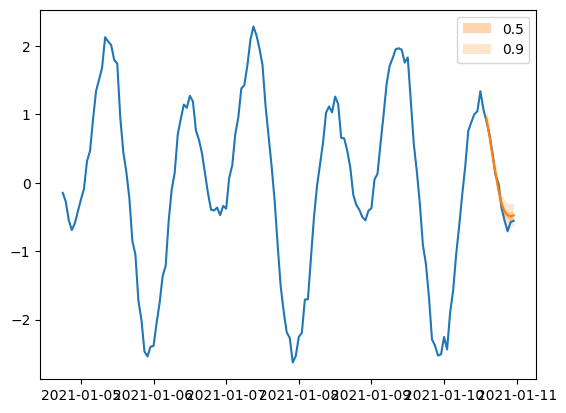

In [137]:
i = np.random.randint(0,len(forecasts))
plt.plot(tss[i][-150:].to_timestamp())
forecasts[i].plot(show_label=True)
plt.legend()

In [138]:
def generate_single_ts(date_range, item_id=None) -> pd.DataFrame:
    """create sum of `n_f` sin/cos curves with random scale and phase."""
    n_f = 2
    period = np.array([24 / (i + 1) for i in range(n_f)]).reshape(1, n_f)
    scale = np.random.normal(1, 0.3, size=(1, n_f))
    phase = 2 * np.pi * np.random.uniform(size=(1, n_f))
    periodic_f = lambda x: scale * np.sin(np.pi * x / period + phase)

    t = np.arange(0, len(date_range)).reshape(-1, 1)
    target = periodic_f(t).sum(axis=1) + np.random.normal(0, 0.1, size=len(t))
    ts = pd.DataFrame({"target": target}, index=date_range)
    if item_id is not None:
        ts["item_id"] = item_id
    return ts

ts.shape: (240, 1)
                       target
2021-01-01 00:00:00  0.514251
2021-01-01 01:00:00  0.197952
2021-01-01 02:00:00  0.382575
2021-01-01 03:00:00  0.342329
2021-01-01 04:00:00  0.169558


<Axes: >

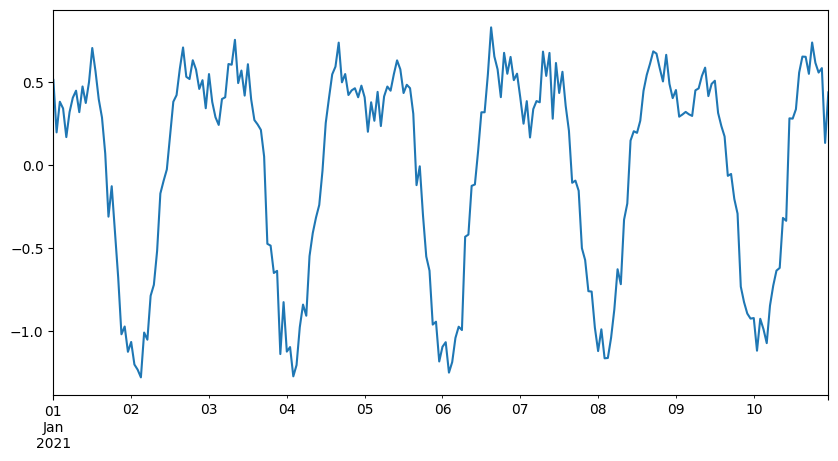

In [139]:

prediction_length, freq = 24, "1H"
T = 10 * prediction_length
date_range = pd.date_range("2021-01-01", periods=T, freq=freq)
ts = generate_single_ts(date_range)

print("ts.shape:", ts.shape)
print(ts.head())
ts.loc[:, "target"].plot(figsize=(10, 5))

In [140]:
from gluonts.evaluation import make_evaluation_predictions, Evaluator
def train_and_predict(dataset, estimator):
    predictor = estimator.train(dataset)
    forecast_it, ts_it = make_evaluation_predictions(
        dataset=dataset, predictor=predictor
    )
    evaluator = Evaluator(quantiles=(np.arange(20) / 20.0)[1:])
    agg_metrics, item_metrics = evaluator(ts_it, forecast_it, num_series=len(dataset))
    return agg_metrics["MSE"]


In [141]:

def generate_single_ts_with_features(date_range, item_id) -> pd.DataFrame:
    ts = generate_single_ts(date_range, item_id)
    T = ts.shape[0]
    # static features are constant for each series
    ts["dynamic_real_1"] = np.random.normal(size=T)
    ts["dynamic_real_2"] = np.random.normal(size=T)
    # ... we can have as many static or dynamic features as we like
    return ts
ts = generate_single_ts_with_features(date_range, item_id=0) #en theorie on va mettre par ex. plusieurs features pr la volatilite etc.. / 1 feature par element. 
ts.head()

,target,item_id,dynamic_real_1,dynamic_real_2
2021-01-01 00:00:00,0.565662,0,-0.689602,-0.455696
2021-01-01 01:00:00,0.561349,0,-0.024339,-0.665355
2021-01-01 02:00:00,0.916655,0,1.312625,-1.658576
2021-01-01 03:00:00,0.816374,0,-0.390880,-0.486322
2021-01-01 04:00:00,0.981390,0,1.242483,1.396413


In [142]:
estimator_with_features = DeepAREstimator(freq="H",prediction_length=10,context_length=20,
                                          num_feat_dynamic_real=2)

In [143]:
N=1000
multiple_ts = {
    i: generate_single_ts_with_features(date_range, item_id=i) for i in range(N)
}
static_features = pd.DataFrame(
    {
        "color": pd.Categorical(np.random.choice(["red", "green", "blue"], size=N)),
        "height": np.random.normal(loc=100, scale=15, size=N),
    },
    index=list(multiple_ts.keys()),
)
multiple_ts_long = pd.concat(multiple_ts.values())

multiple_ts_dataset = PandasDataset(
    multiple_ts,
    feat_dynamic_real=["dynamic_real_1", "dynamic_real_2"],
    static_features=static_features,
)
# for long-dataset we use a different constructor and need a `item_id` column
multiple_ts_long_dataset = PandasDataset.from_long_dataframe(
    multiple_ts_long,
    item_id="item_id",
    feat_dynamic_real=["dynamic_real_1", "dynamic_real_2"],
    static_features=static_features,
)

In [144]:
estimator_with_features.train(multiple_ts_dataset)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


/Users/adriencortes/Documents/13- Articles/7- TimeGrad/pytorch-ts-master/pytorchts/lib/python3.9/site-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: 
  | Name  | Type        | Params | Mode  | In sizes                                                      | Out sizes   
-----------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 28.0 K | train | [[1, 1], [1, 1], [1, 740, 7], [1, 740], [1, 740], [1, 10, 7]] | [1, 100, 10]
-----------------------------------------------------------------------------------------------------------------------------
28.0 K    Trainable params
0         Non-trainable params
28.0 K    Total params
0.112     Total estimated model params size (MB)
INFO:lightning.pytorch.callbacks.model_summary:
  | Name  | Type        | Params | Mode  | In sizes                       

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 1.14879 (best 1.14879), saving model to '/Users/adriencortes/Documents/20-TimeSeriesFeatRehm/gluonTSDemo/gluonTS/gluonTS/lightning_logs/version_19/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 1.14879 (best 1.14879), saving model to '/Users/adriencortes/Documents/20-TimeSeriesFeatRehm/gluonTSDemo/gluonTS/gluonTS/lightning_logs/version_19/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached 0.22675 (best 0.22675), saving model to '/Users/adriencortes/Documents/20-TimeSeriesFeatRehm/gluonTSDemo/gluonTS/gluonTS/lightning_logs/version_19/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'train_loss' reached 0.22675 (best 0.22675), saving model to '/Users/adriencortes/Documents/20-TimeSeriesFeatRehm/gluonTSDemo/gluonTS/gluonTS/lightning_logs/version_1

gluonts.torch.model.predictor.PyTorchPredictor(batch_size=32, device='auto', forecast_generator=gluonts.model.forecast_generator.SampleForecastGenerator(), input_names=['feat_static_cat', 'feat_static_real', 'past_time_feat', 'past_target', 'past_observed_values', 'future_time_feat'], input_transform=Chain(transformations=[gluonts.transform.field.RemoveFields(field_names=['feat_static_real']), gluonts.transform.field.SetField(output_field='feat_static_cat', value=[0]), gluonts.transform.field.SetField(output_field='feat_static_real', value=[0.0]), gluonts.transform.convert.AsNumpyArray(dtype=<class 'int'>, expected_ndim=1, field='feat_static_cat'), gluonts.transform.convert.AsNumpyArray(dtype=<class 'numpy.float32'>, expected_ndim=1, field='feat_static_real'), gluonts.transform.convert.AsNumpyArray(dtype=<class 'numpy.float32'>, expected_ndim=1, field='target'), gluonts.transform.feature.AddObservedValuesIndicator(dtype=<class 'numpy.float32'>, imputation_method=gluonts.transform.featu

A priori on peut donc donner n'importe quels features pour l'entrainement. Essayer de tester avec des features +/- compliqués, voir si ça réagit toujours ? 

In [191]:
from gluonts.transform import (
    Transformation,
    Chain,
    RemoveFields,
    SetField,
    AsNumpyArray,
    AddObservedValuesIndicator,
    AddTimeFeatures,
    AddAgeFeature,
    VstackFeatures,
    InstanceSplitter,
    ValidationSplitSampler,
    TestSplitSampler,
    ExpectedNumInstanceSampler,
    MissingValueImputation,
    DummyValueImputation,
)
from gluonts.dataset.field_names import FieldName
from gluonts.dataset.common import Dataset
from gluonts.itertools import Cyclic
import torch 
from gluonts.dataset.loader import as_stacked_batches

In [193]:

def create_instance_splitter(
   mode: str
):
    assert mode in ["training", "validation", "test"]

    instance_sampler = {
        "training":  ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=12
        ),
        "validation":  ExpectedNumInstanceSampler(
            num_instances=1.0, min_future=12
        ),
        "test": TestSplitSampler(),
    }[mode]

    return InstanceSplitter(
        target_field=FieldName.TARGET,
        is_pad_field=FieldName.IS_PAD,
        start_field=FieldName.START,
        forecast_start_field=FieldName.FORECAST_START,
        instance_sampler=instance_sampler,
        past_length=12, #pas vraiment besoin du module ici. Plus une version soft. 
        future_length=10,
        #time_series_fields=[
        #    FieldName.FEAT_TIME,
        #    FieldName.OBSERVED_VALUES,
        #],
       # dummy_value=self.distr_output.value_in_support,
    )


In [194]:
instanceGluonTS = create_instance_splitter("training") 

In [203]:
PREDICTION_INPUT_NAMES = [
    "feat_static_cat",
    "feat_static_real",
    "past_time_feat",
    "past_target",
    "past_observed_values",
    "future_time_feat",
]

TRAINING_INPUT_NAMES = PREDICTION_INPUT_NAMES + [
    "future_target",
    "future_observed_values",
]
TRAINING_INPUT_NAMES = [
                        "feat_static_cat"]

def create_training_data_loader(
    data: Dataset,
    shuffle_buffer_length: Optional[int] = None,
    **kwargs,
) -> Iterable:
    data = Cyclic(data).stream() #permet de construire un itérable 
    instances = create_instance_splitter("training").apply(
        data, is_train=True
    )
    return as_stacked_batches(
        instances,
        batch_size=40,
        shuffle_buffer_length=shuffle_buffer_length,
        field_names=TRAINING_INPUT_NAMES,
        output_type=torch.tensor,
        num_batches_per_epoch=20,
    )

In [200]:
dataset = get_dataset("electricity")  #va contenir un .train, un .test directement.

In [201]:
next(iter(dataset.train))

{'target': array([14., 18., 21., ...,  6.,  9.,  7.], dtype=float32),
 'start': Period('2012-01-01 00:00', 'H'),
 'feat_static_cat': array([0], dtype=int32),
 'item_id': 0}

In [205]:
for x in create_training_data_loader(dataset.train):
    print(x)
    break

{'feat_static_cat': tensor([[ 0],
        [ 0],
        [ 4],
        [ 5],
        [ 5],
        [ 7],
        [ 8],
        [10],
        [13],
        [13],
        [14],
        [15],
        [17],
        [17],
        [18],
        [19],
        [19],
        [20],
        [20],
        [20],
        [23],
        [24],
        [24],
        [25],
        [25],
        [25],
        [26],
        [27],
        [27],
        [28],
        [28],
        [29],
        [29],
        [31],
        [37],
        [38],
        [39],
        [41],
        [43],
        [43]], dtype=torch.int32)}


In [188]:
next(iter(create_training_data_loader(dataset.train)))


KeyError: 'time_feat'